# TensorFlow и Нейронные сети. Домашнее задание

In [1]:
%matplotlib inline
from __future__ import print_function
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [2]:
tf.__version__

'1.3.0'

In [3]:
np.__version__

'1.13.1'

## Работа с синтаксисом

### Q1. Применить функции активации `relu`, `elu`, и `softplus` к `x`.

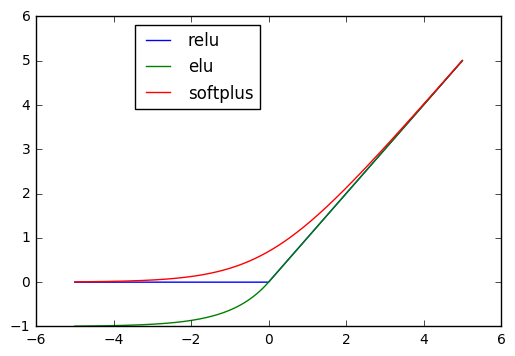

In [5]:
_x = np.linspace(-5., 5., 1000) # Создаем массив из 1000 элементов, распределенных равномерно между -5 и 5
x = tf.convert_to_tensor(_x)      # Преобразовываем в тензор, с которым умеет работать TensorFlow

relu = tf.nn.relu(x)
elu = tf.nn.elu(x)
softplus = tf.nn.softplus(x)

with tf.Session() as sess:
    _relu, _elu, _softplus = sess.run([relu, elu, softplus])
    plt.plot(_x, _relu, label='relu')
    plt.plot(_x, _elu, label='elu')
    plt.plot(_x, _softplus, label='softplus')
    plt.legend(bbox_to_anchor=(0.5, 1.0))
    plt.show()

### Q2. Применить функции активации `sigmoid`, `softsign` и `tanh` к x.

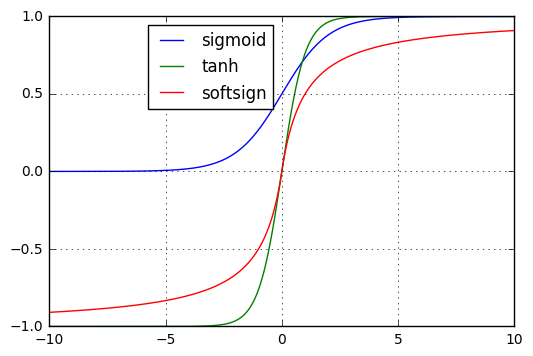

In [6]:
_x = np.linspace(-10., 10., 1000)
x = tf.convert_to_tensor(_x)

sigmoid = tf.nn.sigmoid(x)
tanh = tf.nn.tanh(x)
softsign = tf.nn.softsign(x)

with tf.Session() as sess:
    _sigmoid, _tanh, _softsign = sess.run([sigmoid, tanh, softsign])
    plt.plot(_x, _sigmoid, label='sigmoid')
    plt.plot(_x, _tanh, label='tanh')
    plt.plot(_x, _softsign, label='softsign')
    plt.legend(bbox_to_anchor=(0.5, 1.0))
    plt.grid()
    plt.show()

### Q3. Применить функцию активации `softmax` к x.

In [7]:
_x = np.array([[1, 2, 4, 8], [2, 4, 6, 8]], dtype=np.float32)
x = tf.convert_to_tensor(_x)

# Напишите недостающий участок кода
out = tf.nn.softmax(x)

# Проверьте, что сумма элементов вектора х (представленного в виде тензора) равна 1 после активации.
sess = tf.Session()
_out = sess.run(out)
print('Исходный вектор', _x)
print('Сумма элементов исходного вектора', np.sum(_x, axis=-1))
print('Вектор после softmax', _out)    
print('Сумма элементов преобразованного вектора', np.sum(_out, axis=-1))

Исходный вектор [[ 1.  2.  4.  8.]
 [ 2.  4.  6.  8.]]
Сумма элементов исходного вектора [ 15.  20.]
Вектор после softmax [[  8.92509008e-04   2.42609112e-03   1.79265216e-02   9.78754938e-01]
 [  2.14400887e-03   1.58422012e-02   1.17058903e-01   8.64954829e-01]]
Сумма элементов преобразованного вектора [ 1.          0.99999994]


### Q4. Напишите нейронную сеть, состоящую из одного слоя, который берет на вход x и имеет 2 выхода. Добавьте к выходу функцию активации `sigmoid`

In [8]:
x = tf.random_normal([8, 10])
out = tf.contrib.layers.fully_connected(inputs=x, num_outputs=2, 
                                        activation_fn=tf.nn.sigmoid)
# Отметим, что мы можем использовать другой вариант инициализации
# out = tf.contrib.layers.fully_connected(inputs=x, num_outputs=2, 
#                                         activation_fn=tf.nn.sigmoid,
#                                         weights_initializer=tf.contrib.layers.xavier_initializer())
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    print(sess.run(out))

[[ 0.70272189  0.33673009]
 [ 0.75251687  0.29597548]
 [ 0.27814642  0.62901253]
 [ 0.6440751   0.50370067]
 [ 0.12141192  0.93007201]
 [ 0.13702866  0.80075258]
 [ 0.25318676  0.82192826]
 [ 0.80730814  0.21980333]]


## Продолжаем исследовать MNIST 

In [9]:
# Загрузка данных
from tensorflow.examples.tutorials.mnist import input_data
data = input_data.read_data_sets("data/MNIST/", one_hot=True)

Extracting data/MNIST/train-images-idx3-ubyte.gz
Extracting data/MNIST/train-labels-idx1-ubyte.gz
Extracting data/MNIST/t10k-images-idx3-ubyte.gz
Extracting data/MNIST/t10k-labels-idx1-ubyte.gz


In [10]:
print("Размер:")
print("- Обучающей выборки:\t\t{}".format(len(data.train.labels)))
print("- Тестовой выборки:\t\t{}".format(len(data.test.labels)))
print("- Валидационной выборки:\t{}".format(len(data.validation.labels)))

Размер:
- Обучающей выборки:		55000
- Тестовой выборки:		10000
- Валидационной выборки:	5000


In [11]:
# В задаче используется т.н. one-hot encoding меток, т.е. каждая метка задается вектором размерности `число классов`,
# в которой только одна единица, стоящая на позиции, номер которой соответствует классу объекта. 
# При этом остальные элементы вектора меток - нули
data.test.labels[0:5, :]

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.]])

In [12]:
# Однако, можно легко перейти к стандартному способу задания класса объекта (через номер)
data.test.cls = np.array([label.argmax() for label in data.test.labels])
data.test.cls[0:5]

array([7, 2, 1, 0, 4], dtype=int64)

In [13]:
# В этой ячейке определим некоторые параметры датасета:
# Мы знаем, что в MNIST все изображения имеют размер 28х28.
img_size = 28

# Соответственно, векторизованные изображения будут иметь длину 28*28 = 784.
img_size_flat = img_size * img_size

# Зададим переменную, описывающую геометрию данных.
img_shape = (img_size, img_size)

# Число классов.
num_classes = 10

In [14]:
# В этой ячейке определим функцию, крайне полезную для изображения данных
# Вход: np.array(28,28,n_images) - выборка изоборажений, np.array(n_images) истинные метки в классическом формате (не one-hot), np.array(n_images) - предсказанные метки в классическом формате (не обязательный параметр)
def plot_images(images, cls_true, cls_pred=None):
    assert len(images) == len(cls_true) == 9
    
    # Создаем figure для рисования картинок 3х3.
    fig, axes = plt.subplots(3, 3)
    fig.subplots_adjust(hspace=0.3, wspace=0.3)

    for i, ax in enumerate(axes.flat):
        # Plot image.
        ax.imshow(images[i].reshape(img_shape), cmap='binary')

        # Выведем истинные метки и предсказанные метки
        if cls_pred is None:
            xlabel = "True: {0}".format(cls_true[i])
        else:
            xlabel = "True: {0}, Pred: {1}".format(cls_true[i], cls_pred[i])

        ax.set_xlabel(xlabel)
        
        # Удаление осей.
        ax.set_xticks([])
        ax.set_yticks([])

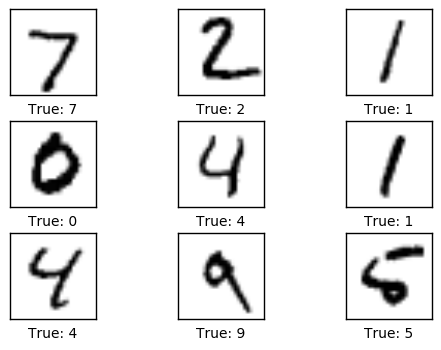

In [15]:
# Давайте выведем несколько первых картинок и проверим корректность датасета
images = data.test.images[0:9]

# Истинные метки датасета.
cls_true = data.test.cls[0:9]

# Нарисуем данные с помощью функции, написанной выше.
plot_images(images=images, cls_true=cls_true)

In [16]:
# В этой ячейке определим все placeholders, в которые позже будем записывать данные и метки
x = tf.placeholder(tf.float32, [None, img_size_flat])    # изображения
y_true = tf.placeholder(tf.float32, [None, num_classes]) # истинные метки (one-hot)
y_true_cls = tf.placeholder(tf.int64, [None])            # истинные метки

In [17]:
# Определим переменные. Именно они будут изменяться в процессе обучения сети
weights = tf.Variable(tf.zeros([img_size_flat, num_classes]))
biases = tf.Variable(tf.zeros([num_classes]))

In [18]:
# Определение модели
logits = tf.matmul(x, weights) + biases     # простое матричное произведение означает один полносвязный слой нейросети
y_pred = tf.nn.softmax(logits)              # предсказание модели (one-hot)
y_pred_cls = tf.argmax(y_pred, axis=1)      # предсказание модели

In [19]:
# Определение функции потерь
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=logits,  # подсчет потерь по каждой метке
                                                        labels=y_true)
cost = tf.reduce_mean(cross_entropy)                                    # эта функция считает среднее значение вектора cross_entropy

In [20]:
# Определение оптимизатора. Величина шага задается параметром learning_rate
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.5).minimize(cost)

# Размер подвыборок, на которых будет тренироваться модель.
batch_size = 100

In [21]:
# Оценка качества модели
correct_prediction = tf.equal(y_pred_cls, y_true_cls)               # сравниваем поэлементно 2 вектора
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))  # считаем долю успешных сравнений

In [22]:
# Все составляющие классификации определены, пора запускать TensorFlow :)
session = tf.Session()
session.run(tf.global_variables_initializer())  # Не забываем инициализировать переменные - это необходимо

def optimize(num_iterations):
    # Определяем процедуру обучения (он же оптимизационный процесс)
    for i in range(num_iterations):
        # Выбираем мини подвыборку тренировочной выборки
        # x_batch будет содержать `batch_size` картинок тренировочной выборки для обучения
        # y_true_batch будет содержать 100 меток в формате one-hot
        x_batch, y_true_batch = data.train.next_batch(batch_size)
        
        # Перед запуском процедуры обучения необходимо заполнить данные,
        # которые мы обещали предоставить для placeholder`ов. 
        # Заметим, что не обязательно предоставлять все значения placeholders - 
        # Нужны лишь те, что используются в конкретном вычислительном графе. Например,
        # чтобы посчитать accuracy нам не нужно задавать метки в классическом формате y_true_cls, т.к. используется только one-hot
        feed_dict_train = {x: x_batch,
                           y_true: y_true_batch}

        # Запускаем оптимизатор на тренировочных данных. Обратите внимание на синтаксис. Мы запускаем конкретный узел вычислительного графа,
        # передавая ему параметры. которые ему нужны для подсчета минимизируемой функции через переменную `feed_dict`
        session.run(optimizer, feed_dict=feed_dict_train)
        
feed_dict_test = {x: data.test.images,
                  y_true: data.test.labels,
                  y_true_cls: data.test.cls}

def print_accuracy():
    # рассчет точности алгоритма при текущих значениях весов на проверочной выборке.
    acc = session.run(accuracy, feed_dict=feed_dict_test)
    
    print("Accuracy on test-set: {0:.1%}".format(acc))
    
def print_confusion_matrix():
    # Эта функция строит матрицу верно и неверно классифицируемых изображений (см. ниже)
    # Истинные метки датасета.
    cls_true = data.test.cls
    
    # Предсказанные метки определяются используемой моделью (см. определение выше).
    cls_pred = session.run(y_pred_cls, feed_dict=feed_dict_test)

    # С помощью sklearn строим матрицу несоответствия предсказанного и истинного значения класса (confusion matrix).
    cm = confusion_matrix(y_true=cls_true,
                          y_pred=cls_pred)

    # Вывод этой матрицы как текста.
    print(cm)

    # Вывод confusion matrix как изображения.
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)

    # Декоративные надстройки для приятной картинки (подписи, оси, и т.д.).
    plt.tight_layout()
    plt.colorbar()
    tick_marks = np.arange(num_classes)
    plt.xticks(tick_marks, range(num_classes))
    plt.yticks(tick_marks, range(num_classes))
    plt.xlabel('Predicted')
    plt.ylabel('True')
    
def plot_example_errors():
    # Эта функция строит несколько неверно классифицируемых алгоритмов картинок. Это очень полезно, чтобы понять в каких кейсах алгоритм допускает ошибки
    correct, cls_pred = session.run([correct_prediction, y_pred_cls],
                                    feed_dict=feed_dict_test)

    # Массив, содержащий индексы неверно классифицируемых изображений
    incorrect = (correct == False)
    
    # Получим те изображения из выборки, что были классифицированы неверно.
    images = data.test.images[incorrect]
    
    # Предсказанные моделью метки.
    cls_pred = cls_pred[incorrect]

    # Истинные метки изображений.
    cls_true = data.test.cls[incorrect]
    
    # Нарисуем первые 9 изображений.
    plot_images(images=images[0:9],
                cls_true=cls_true[0:9],
                cls_pred=cls_pred[0:9])
    
def plot_weights():
    # Эта функция показывает для каждого класса на картинке 28*28 какие пиксели наиболее вероятно определяют принадлежность данной картинки к этому классу.
    # Проще говоря, она строит 10 изображений, каждое из которых характеризует "среднее" изображение для своего класса :)
    # Заносим в питоновскую переменную текущее значение 
    w = session.run(weights)
    
    # Поиск минимального и максимального значения веса для класса в целях нормировки на них
    w_min = np.min(w)
    w_max = np.max(w)

    # Картинка будет содержать 3х4 подкартинки, последние 2 не будут использоваться (нам нужно 10 классов)
    fig, axes = plt.subplots(3, 4)
    fig.subplots_adjust(hspace=0.3, wspace=0.3)

    for i, ax in enumerate(axes.flat):
        if i<10:
            # Отметим, что форма вектора весов w.shape == (img_size_flat, 10)
            image = w[:, i].reshape(img_shape)

            # Подписи осей.
            ax.set_xlabel("Weights: {0}".format(i))

            # Построение изображения
            ax.imshow(image, vmin=w_min, vmax=w_max, cmap='seismic')

        # Удаление подписей.
        ax.set_xticks([])
        ax.set_yticks([])

In [23]:
# Проверим точность предсказаний нашей модели до тренировки при случайной инициализации (1 из 10 классов -> должно быть около 10%)
print_accuracy()

Accuracy on test-set: 9.8%


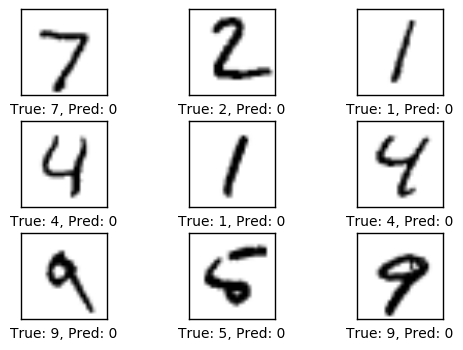

In [24]:
plot_example_errors()

Accuracy on test-set: 31.8%


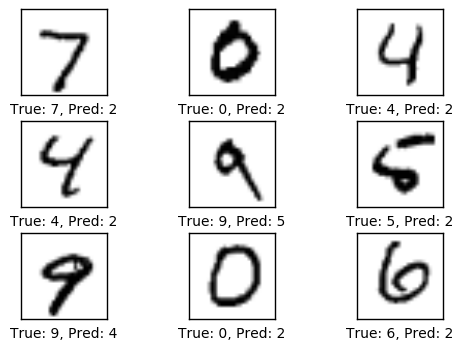

In [25]:
# Что насчет точности после одной итерации?
optimize(num_iterations=1)
print_accuracy()
plot_example_errors()

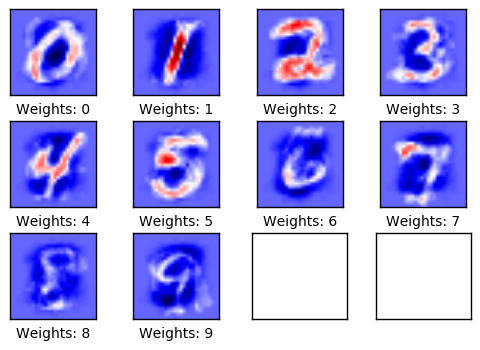

In [27]:
plot_weights()
# Обратите внимание, что уже после одной итерации веса настроены адекватно

Accuracy on test-set: 80.0%


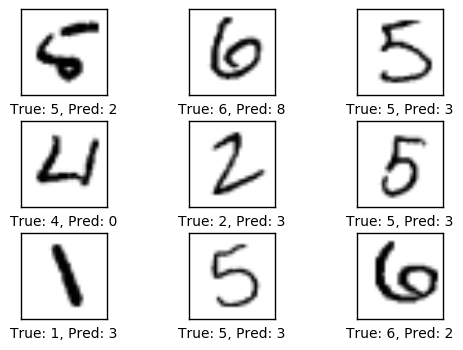

In [28]:
# 10 итераций?
optimize(num_iterations=9)  # 9 здесь потому, что одну итерацию мы уже совершили
print_accuracy()
plot_example_errors()

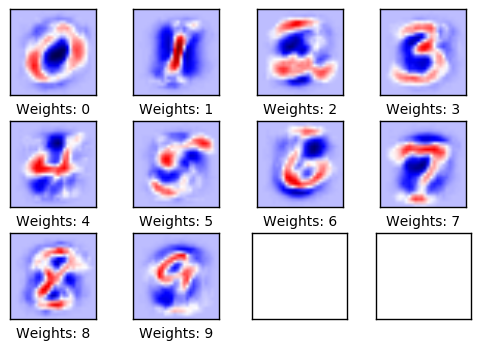

In [29]:
plot_weights()

Accuracy on test-set: 91.8%


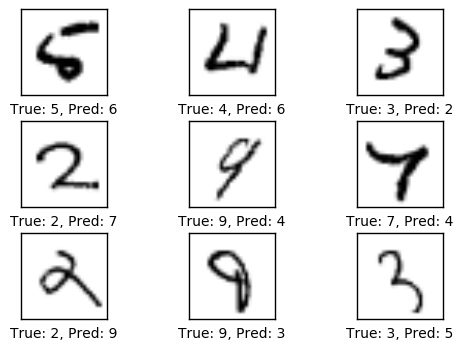

In [30]:
# 1000 итераций?
optimize(num_iterations=990)  # 990 здесь потому, что 10 мы уже совершили раньше
print_accuracy()
plot_example_errors()

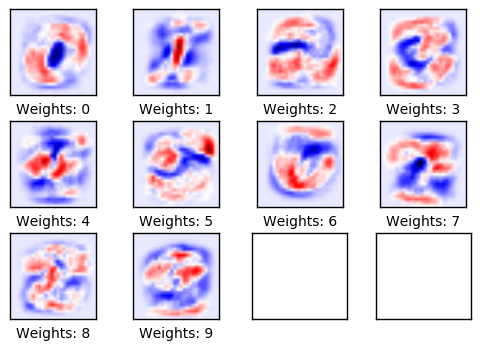

In [33]:
plot_weights()
# Вы наблюдаете картину среднего почерка рукописных цифр :)

[[ 958    0    0    2    0    8   10    1    1    0]
 [   0 1109    2    2    0    3    4    1   14    0]
 [  11   10  909   18    7    2   16   12   42    5]
 [   4    1   19  905    0   42    3   14   17    5]
 [   2    3    6    2  910    2   13    2   11   31]
 [  10    4    3   27    5  795   17    5   21    5]
 [  10    3    3    2    9   16  913    1    1    0]
 [   4    9   21    9    6    3    0  951    3   22]
 [   8    9    6   21    8   45   11   11  852    3]
 [  12    9    1   11   39   16    1   41    6  873]]


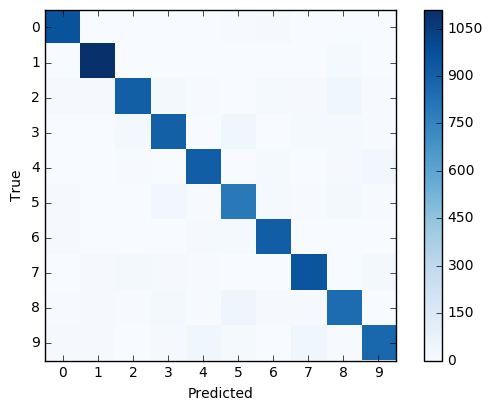

In [34]:
print_confusion_matrix()

Задачи
* Поменяйте шаг оптимизационного алгоритма. Что изменилось? Как подобрать оптимальный шаг?
* Попробуйте использовать другий алгоритмы оптимизации, например AdagradOptimizer or AdamOptimizer. Получился ли результат лучше?
* Запустите алгоритм на очень маленьком и очень большом размере подвыборки, например 1 или 1000.
* Как эти изменения сказываются на итоговой точности модели?
* Как вы думаете, какие из этих эффектов характерны для всех задач машинного обучения, а какие лишь для этой?
* Меняется ли полученный результат при запуске одного и того же кода на одном компьютере от случая к случаю? Почему?
* Измените функцию plot_example_errors() так, чтобы она выводила еще и вероятности того, что объект принадлежит предсказанному классу (можно не вероятности, а logits) предсказанных меток y_pred для неверно классифицируемых случаев.
* Используйте sparse_softmax_cross_entropy_with_logits вместо softmax_cross_entropy_with_logits. Это может потребовать некоторых изменений в исходном коде. Сравните использование двух функций